# Imports

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_df.csv', index_col=0)

In [3]:
df.columns

Index(['lat', 'long', 'BIRD', 'CAT', 'DOG', 'EXOTIC', 'FOWL', 'LIVESTOCK',
       'OTHER', 'REPTILE', 'WILDLIFE', 'HERDING', 'HOUND', 'MIXED',
       'NONSPORTING', 'OTHER_BREED', 'SPORTING', 'TERRIER', 'TOY', 'WORKING',
       'F', 'M', 'U', 'EXTRA LARGE', 'LARGE', 'MEDIUM', 'SMALL', 'EMACIATED',
       'EXCELLENT', 'FAIR', 'GOOD', 'POOR', 'SUMMER', 'SPRING', 'FALL',
       'WINTER', 'NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
      dtype='object')

In [4]:
df

,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,REPTILE,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,30.494640,-91.156160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,30.431417,-91.141070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
2,30.648540,-91.156770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
3,30.476015,-91.168460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
4,30.429104,-91.185036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36118,30.475130,-91.156157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
36119,30.451468,-91.187147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,1,0,0
36120,30.355068,-91.122734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,1,0,0,0
36121,30.389151,-91.207927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0


# Initial Decision Tree Model

In [5]:
y = df['NORMAL'] + df['FRIENDLY']
X = df.drop(columns=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'])

In [6]:
X

,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,REPTILE,...,SMALL,EMACIATED,EXCELLENT,FAIR,GOOD,POOR,SUMMER,SPRING,FALL,WINTER
0,30.494640,-91.156160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
1,30.431417,-91.141070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
2,30.648540,-91.156770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
3,30.476015,-91.168460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
4,30.429104,-91.185036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36118,30.475130,-91.156157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
36119,30.451468,-91.187147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
36120,30.355068,-91.122734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0
36121,30.389151,-91.207927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

In [8]:
# find train error
mod = DecisionTreeClassifier(criterion='entropy')
# train
mod.fit(X_train, y_train)
# generate predictions on train set
pred = mod.predict(X_train)
# find accuracy for train set
print('Training Accuracy without limiting max_depth: ' + str(accuracy_score(y_train, pred)))

Training Accuracy without limiting max_depth: 0.9882543700071186


In [9]:
# find test error
mod = DecisionTreeClassifier(criterion='entropy')
# train
mod.fit(X_train, y_train)
# generate predictions on test set
pred = mod.predict(X_test)
# find accuracy for test set
print('Test Accuracy without limiting max_depth: ' + str(accuracy_score(y_test, pred)))

Test Accuracy without limiting max_depth: 0.720217772446249


In [10]:
# somewhat overfit, 27% accuracy loss

In [11]:
# generate error graph with x as the max depth (aka model complexity)
train_error = []
test_error = []
depths = []
for depth in range(1, 30):
    depths += [depth]
    # find train error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth, class_weight='balanced')
    # train
    mod.fit(X_train, y_train)
    # generate predictions on train set
    pred = mod.predict(X_train)
    # find accuracy for train set
    train_error += [accuracy_score(y_train, pred)]
    
    # find test error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth, class_weight='balanced')
    # train
    mod.fit(X_train, y_train)
    # generate predictions on test set
    pred = mod.predict(X_test)
    # find accuracy for test set
    test_error += [accuracy_score(y_test, pred)]

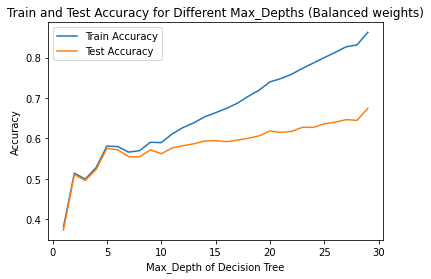

In [12]:
# draw graph
plt.plot(depths, train_error, label='Train Accuracy')
plt.plot(depths, test_error, label='Test Accuracy')
plt.xlabel('Max_Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Different Max_Depths (Balanced weights)')
plt.show()

# Initial RandomForest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
pred = clf.predict(X_train)
# find accuracy for train set
print('Training Accuracy without limiting max_depth: ' + str(accuracy_score(y_train, pred)))

Training Accuracy without limiting max_depth: 0.9882543700071186


In [16]:
pred = clf.predict(X_test)
# find accuracy for test set
print('Test Accuracy without limiting max_depth: ' + str(accuracy_score(y_test, pred)))

Test Accuracy without limiting max_depth: 0.7670019378056657


In [17]:
y

0        1
1        1
2        1
3        1
4        1
        ..
36118    1
36119    0
36120    1
36121    1
36122    1
Length: 36123, dtype: int64

In [18]:
y.mean()

0.7706724247709216

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.47      0.32      0.38      2410
           1       0.82      0.89      0.86      8427

    accuracy                           0.77     10837
   macro avg       0.64      0.61      0.62     10837
weighted avg       0.74      0.77      0.75     10837



# Since class=0 (sensitive cases) are under-represtented, apply over-sampling to balance representation

In [21]:
frac = 1/(1 - y.mean()) * 1/2
frac

2.1802873008208596

In [22]:
df['Target'] = df['FRIENDLY'] + df['NORMAL']

In [23]:
# class 0 is under-represnted class to be oversampled
to_append = df[df['Target'] == 0].sample(frac=2, replace=True)

In [24]:
df_overs = pd.concat([df, to_append])

In [25]:
df_overs['Target'].mean()

0.5283444990605606

In [26]:
X = df_overs.drop(columns=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED', 'Target'])
y = df_overs['Target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8)

# Decision Tree After Oversampling

In [36]:
# generate error graph with x as the max depth (aka model complexity)
train_error = []
test_error = []
depths = []
for depth in range(1, 60):
    depths += [depth]
    # find train error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    # train
    mod.fit(X_train, y_train)
    # generate predictions on train set
    pred = mod.predict(X_train)
    # find accuracy for train set
    train_error += [accuracy_score(y_train, pred)]
    # generate predictions on test set
    pred = mod.predict(X_test)
    # find accuracy for test set
    test_error += [accuracy_score(y_test, pred)]

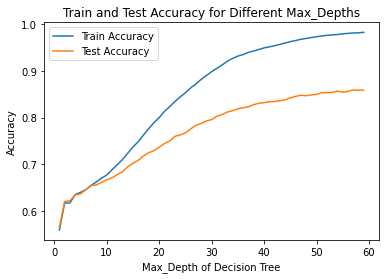

In [37]:
# draw graph
plt.plot(depths, train_error, label='Train Accuracy')
plt.plot(depths, test_error, label='Test Accuracy')
plt.xlabel('Max_Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Different Max_Depths')
plt.show()

In [38]:
mod = DecisionTreeClassifier()
mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      5021
           1       0.94      0.78      0.85      5518

    accuracy                           0.86     10539
   macro avg       0.87      0.86      0.86     10539
weighted avg       0.87      0.86      0.86     10539



## Random Forest Model after Oversampling

In [40]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
pred = clf.predict(X_train)
# find accuracy for train set
print('Training Accuracy without limiting max_depth: ' + str(accuracy_score(y_train, pred)))

Training Accuracy without limiting max_depth: 0.9873315619662175


In [42]:
pred = clf.predict(X_test)
# find accuracy for test set
print('Test Accuracy without limiting max_depth: ' + str(accuracy_score(y_test, pred)))

Test Accuracy without limiting max_depth: 0.86829870006642


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5021
           1       0.93      0.81      0.87      5518

    accuracy                           0.87     10539
   macro avg       0.87      0.87      0.87     10539
weighted avg       0.88      0.87      0.87     10539



Random forest preforms pretty well, but plotting an overfitting graph has been difficult; messing with n_estimators and max_depth yields flat accuracy curves.

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(y_test, pred)

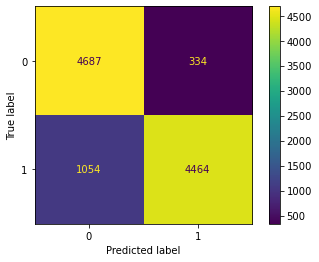

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Other Ensembles (AdaBoost, XGBoost)

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [49]:
pred = clf.predict(X_train)
# find accuracy for train set
print('Training Accuracy without limiting max_depth: ' + str(accuracy_score(y_train, pred)))

Training Accuracy without limiting max_depth: 0.6514281647371418


In [50]:
pred = clf.predict(X_test)
# find accuracy for test set
print('Test Accuracy without limiting max_depth: ' + str(accuracy_score(y_test, pred)))

Test Accuracy without limiting max_depth: 0.645317392541987


In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      5021
           1       0.68      0.61      0.64      5518

    accuracy                           0.65     10539
   macro avg       0.65      0.65      0.65     10539
weighted avg       0.65      0.65      0.65     10539



In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [54]:
pred = clf.predict(X_train)
# find accuracy for train set
print('Training Accuracy without limiting max_depth: ' + str(accuracy_score(y_train, pred)))

Training Accuracy without limiting max_depth: 0.673325109128867


In [55]:
pred = clf.predict(X_test)
# find accuracy for test set
print('Test Accuracy without limiting max_depth: ' + str(accuracy_score(y_test, pred)))

Test Accuracy without limiting max_depth: 0.6634405541322707


In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      5021
           1       0.69      0.65      0.67      5518

    accuracy                           0.66     10539
   macro avg       0.66      0.66      0.66     10539
weighted avg       0.67      0.66      0.66     10539

